<a href="https://colab.research.google.com/github/mcgoughlin/Python4ML/blob/main/week1/MLWorkshop_Week1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot_line(m,C):
  x = np.linspace(-20,20)
  def f(x, m=m, C=C):
      return (x)*m + C

  plt.figure(figsize=(8,6))
  plt.plot(x,f(x))
  plt.ylim(-50,50)
  plt.xlim(-20,20)

# Coding Tutorial: Introduction to Python, Numpy, and Linear Regression

Welcome to your first coding tutorial! 

In this tutorial, you will learn the basics of Python, the most popular programming language in the world, and how to manipulate data effectively within Python using the **NumPy** package. We will end the tutorial by learning to implement linear regression with one variable to predict the effect of COVID vaccines and lockdowns on COVID deaths in the South-East of England.

Source of our COVID data: https://coronavirus.data.gov.uk/details/download


# Outline
- [ 1 - The Basics of Python](#1)
  - [ 1.1 - Constants and Variables ](#1.1)
  - [ 1.2 - Data Structures ](#1.2)
  - [ 1.3 - Functions ](#1.3)
  - [ 1.4 - Summary ](#1.4)
- [ 2 - Linear regression with one variable ](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2 Dataset](#2.2)
  - [ 2.3 Loss Function](#2.3)
  - [ 2.4 Gradient Descent](#2.4)
  - [ 2.5 COVID Exercise](#2.5)
  - [ 2.6 Summary](#2.5)

<a name="1"></a>
## 1 - Basics of Python
<a name="1.1"></a>
### 1.1 Constants, Variables, and Operators

Lets refresh our memory of basic mathematics, in the context of using Python.

First, let's cover operators - adding, subtracting, multiplying and dividing. We will ask Python to 'print' - state the value -  of each operation below to determine the value of each of the following statements:


In [ ]:
print(5) ## print the value of 5
print(5+2) ## print the value of 5 added to 2
print(5*2) ## print the value of 5 multiplied by 2
print(5*2 +3) ## print the value of 5 multiplied by 2 and then added to 3
print(5*(2+5)) ## using brackets to order operations: print the value of 2 added to 5 and then multiplied by 5
print(5**2) ## print the value of 5 to the power of 2
print(5/2) ## print the value of 5 divided by 2

You will see that the operations stated in the code block perform as expected. The order of operations obey BODMAS, PEMDAS, or whatever strange acronym you learned to order your mathematical operations in high school.

The numbers used in this code are known as constants, as their value cannot change dynamically throughout the code. We cannot reassign the value of the number '5' - it is just 5. Lets perform operations on variables, whose values can and do change throughout code...

In [ ]:
variable_one = 5
print("Variable one's value is now",variable_one) ## print the value of the internal statement - variable_one - which is previously defined as 5

variable_two = variable_one*10 + 2
print("Variable two's value is now",variable_two) ## print the value of the new variable - variable_two

variable_one = 0.1*(variable_one+variable_two) ## variable one's value has been changed here!
print("Variable one's value is now",variable_one)

We write variable names in a singular block of plain text - no spaces or punctuation besides '_' - and assign a value to it using the '=' sign, like so



```
variable_one = 5
```



Using variables, we can manipulate the value of data passed through code dynamically, allowing generalisable software to be applied to data without having to know the data's literal values.

Now, let us move on to a simple equation, predicated on these concepts of operators, contants and variables:


\begin{align}
Y &= mX + C \tag{1}
\end{align}

The equation above represents a simple linear formula that we may recognise from high school. An infinite number of possible linear curves can be produced by this formula. Test this out by running the code below and changing the values of $m$ and $C$. For now, only change the values of $m$ and $C$ to other small numbers, where -2 < m < 2 and -10 < C < 10. 

In [ ]:
m = -2
C = 10

#I wrote this 'plot_line' function before we started :)
plot_line(m,C)

Traditionally, we think of X and Y as the variables in equation (1) ($X$ the independent variable, and $Y$ the dependent), and $m$ and $C$ as the constants that dictate the shape of the linear curve. However, our code above allows us to *vary* the values $m$ and $C$, making them *variables* in our code. 

### So what?

Well, its important to recognise the variability of data in our code and software - variables can change value, and we must write software that can handle value changes in order to write good code. In reality, nearly all code in software is constituted by variables whose values can be unpredictable. Good software - good code - anticipates *how* input data and variables may change.

### Code that fails
To see how code can fail, change the values of $C$ in the below block to 100 or above. **Run the code block below.** 

Notice how our figure now fails to show a line? Both figures, produced by the same software,  have a fixed x-axis between $-20$ and $20$ and y-axis between $-50$ and $50$. Thus, when C exceeds 100, the plot cannot display our linear curve. Our software worked well for our neat initial example, where we bounded values of $m$ and $C$ to be small constants, but our software fails to generalise to all values of $C$ due to our poor anticipation of these values' variability.

In [ ]:
C = 100

plot_line(m,C)

<a name="1.2"></a>
### 1.2 Data Structures

Data structures are objects that hold data and enable efficient processing of  data. They are absolutely fundamental to writing good software. If you take one thing away from this first tutorial, let it be this:


> **Good code is always predicated on the correct use of data structures.**


Data structures allow coders to store and sort data in code, and perform efficient operations on all data within. In this section, you will see that conceptualising software writing as ***the manipulation of data structures*** will help you write better code, and satisfy the lesson of the first subsection:


* 1.1 *Good code must be adaptive to variables to be useful in real-world settings.*


First, let us consider the most basic data structure: the array. In the code block below, we import the **numpy** package, which is *the* python package for handling arrays. An array is simply an ordered set of values, where all values are stored with accessible using an index. For example, in the array $ [ 1, 4, -19, 32.2] $, the value $-19$ is accessed by selecting the array element at index 3, as $-19$ exists in the $3^{rd}$ position of the array.  The **numpy** package gives us the ability to create arrays, and all the functions we could wish to manipulate them with. 

Now, let's instantiate - create - an array full of numbers.

In [ ]:
import numpy as np

our_first_array = np.array([1.01, 102.54, -83.9, 0.0, 18.01, 22.304642,2.04])

An array is simply an ordered list of numbers. Let's find out some information about this array:

In [ ]:
print("Array max is",np.max(our_first_array))
print("Array min is",np.min(our_first_array))
print("Array median is",np.median(our_first_array))
print("Array mean is",np.mean(our_first_array))
print("Array standard deviation is",np.std(our_first_array))

Very cool - but what just happened?

Well, all data structures are designed to do two things: **hold data** and **perform operations on data**. Our array is holding the numbers that we gave it, namely: $[1.01, 102.54, -83.9, 0.0, 18.01, 22.304642, 2.04]$. Our array, and the **numpy** package, comes with functions that help us manipulate this data.  These **numpy** functions are super fast and written by software geniuses - using packaged software and data structures is almost invariably the fastest and most efficiency way of processing data and writing software.

So this is what we just did, in steps:

1. We imported the **numpy** package, and renamed it 'np' in our code, for brevity.
2. We instantiated an array, a data structure sourced from **numpy**, with the variable name 'our_first_array'. This array holds a list of numbers.
3. We used **numpy** functions, which are accessed with '.' following 'np', to find out information about our_first_array.

Okay fine, but what ***is*** a function?

<a name="1.3"></a>
### 1.3 Functions

Functions are any bit of code that receive inputs - enclosed within brackets following their name - and return outputs. For example:

In [ ]:
np.mean([1,2,4,8,16,32])


The function above uses numpy's 'mean' function to calculate the mean of the following list of numbers: $[1,2,4,8,16,32]$, and returns its mean - the value 10.5. This is to say the function has ONE input - a list of numbers - and returns ONE output - a single number, corresponding to the list's mean. Many numpy functions can only be used on lists and arrays. Many numpy functions take and receive multiple inputs and outputs. Some can be performed on individual numbers, like the one below that calculates 2 to the power of the input

In [ ]:
np.exp2(10)


To find numpy's full list of functions, run the code block below. I warn you though, there's a lot...

In [ ]:
print(dir(np))

We can write our own simple functions using the 'def' special word in Python! To construct a function of your own. simply write the following:

```
def Function_Name(Input1,Input2):
  return Output1
```

Here, we have written a function, named Function_Name, that recieves inputs Input1 and Input2 and sends out Output1 using the special word 'return'.

We always have to write our function's inputs in brackets following the function's name, and butt-end that line with a colon. In every subsequent line of code within the function, we must have an indent (use tab to create this on a keyboard) to indicate that line of code corresponds to the above function. The only way to make a function give an output is to use the special word 'return'. 'return' forces the function to output whatever follows in the same line of code, and then ends the function.

Let's write our own simple adding function:

In [ ]:
def adding_function(number1,number2):
  ans = number1+number2
  return "The answer to {} + {} = {}".format(number1,number2,ans)

print(adding_function(1,2))
print(adding_function(68924,2134))

Brilliant! Our adding function receives  two inputs, adds them together, and returns the answer in a text format that's amenable for printing. 

Now, lets try to write our linear equation (1) as a function, that recieves x as an input and returns y.

In [ ]:
def linear_function(x):
  m = 3
  C = 5
  return m*x + C

print("X = 0, Y =",linear_function(0))
print("X = -15, Y =",linear_function(-15))
print("X = 524, Y =",linear_function(524))

### Exercise 1

Try writing a function below that finds the 95% confidence range of an any-sized array. You can assume the array's values are distributed in a normal distribution. Do not use the np.percentile function!

**HINT: The 97.5% and 2.5% values in a normal distribution are found using the following equations:**

$$ 2.5\% = mean - 1.96*\frac{Std. Dev.}{\sqrt{n}}$$
$$ 97.5\% = mean + 1.96*\frac{Std. Dev.}{\sqrt{n}}$$

In [ ]:
def CI95(input_array):
  #### WRITE YOUR CODE HERE

  return confidence_interval

Once finished, test your function by running the function code block above, and then testing code block below:

In [ ]:
import numpy as np

array1 = np.random.randn(100)*np.random.randn(1) + np.random.randn(1)
array2 = np.random.randn(1000)*np.random.randn(1) + np.random.randn(1)
array3 = np.random.randn(10000)*np.random.randn(1) + np.random.randn(1)
print("Test One Passed:",CI95(array1)-((np.percentile(array1,97.5) - np.percentile(array1,2.5))/10) < 0.05,"\nPredicted CI: {:.3f}, Actual CI: {:.3f}".format(CI95(array1),(np.percentile(array1,97.5) - np.percentile(array1,2.5))/10))
print("\nTest Two Passed:",CI95(array2)-((np.percentile(array2,97.5) - np.percentile(array2,2.5))/31.62) < 0.01,"\nPredicted CI: {:.3f}, Actual CI: {:.3f}".format(CI95(array2),(np.percentile(array2,97.5) - np.percentile(array2,2.5))/31.62))
print("\nTest Three Passed:",CI95(array3)-((np.percentile(array3,97.5) - np.percentile(array3,2.5))/100) < 0.01,"\nPredicted CI: {:.3f}, Actual CI: {:.3f}".format(CI95(array3),(np.percentile(array3,97.5) - np.percentile(array3,2.5))/100))


<a name="1.4"></a>
### 1.4 Summary

In this opening section, we have covered a lot. We have covered:
1. Operators
2. Contants and Variables
3. Data Types
4. Data Structures
5. Functions

This is everything that you need for programming the most basic supervised machine learning algorithm - linear regression! Congratulations, you can now start performing some basic machine learning. 

To perform more advanced machine learning techniques, you will need to learn more advanced programming concepts. This seem likes a fair deal to me. In the first half of every tutorial, you will be introduced to programming concepts that will help you in the second half of every tutorial, where you will learn increasingly sophisticated machine learning techniques. There are no prerequisites for this course, except having completed high-school mathematics. This course will end with you learning how to train a neural network. I wish you the best of luck on your learning adventure!

<a name="2"></a>
## 2 - Learning to Perform Linear Regression with One Variable

<a name="2.1"></a>
## 2.1 - Problem Statement
Linear regression models fit straight lines to data, in an attempt to model the relationships between two variables with a linear equation. To understand this, let us revisit equation (1) from section 1.1:

\begin{align}
Y &= mX + C \tag{1}
\end{align}

Let's define this more formally: given some values of X and Y, our regression algorithm finds the values of $m$ and $C$ that produce the 'most correct' line that emulates the relationship between X and Y. The best values of $m$ and $C$ are those that best capture the linear relationship between X and Y. **Run the code block below to see how this might look in practise** .

In [ ]:
import numpy as np
import matplotlib.pyplot as plt #a package that helps us plot data

m  = 3 ## I am cheating here!
C = 5 ## I am cheating here!
X = np.arange(-20,20)
Y = m*X + C + np.random.uniform(low=-30,high=30,size=(40))

regression = m*X + C

plt.scatter(X,Y)
plt.plot(X,regression,c='r',label='Linear Relationship between X and Y')
plt.legend()

Of course, in the above example we are cheating! We know the correct values of $m$ and $C$ before starting - we even stated them in the 4th and 5th line of code. Linear regression only provides utility when we do **not** know the correct values of $m$ and $C$, and we wish to find them.

Linear regression is useful when we have some observed data, and we want to abstract general relationships between the data's variables. These abstractions allow us to the predict values of our data at points where we have no observations. To do this, we will need to understand a few new machine learning concepts.

<a name="2.2"></a>
## 2.2 - Datasets

A dataset is a set variables observed in different states. Traditionally, datasets are displayed as a table, where columns refer to variables and rows refer to observations.

In this tutorial we will look at COVID data relating to the South East of England. Specfically, we will be looking at how vaccination rates, case rates, and death rates change over time. First, we must load the data from a file. Google Colab allows us to store files in the same environment as this notebook. We are going to store our data as a '.csv' file named 'covid_data.csv', store it in our 'sample_data' folder, and load it into our python script using the **pandas** package. **Pandas** is brilliant for manipulating and loading datasets in python.

You should have been provided with a file called 'covid_data.csv' ahead of this tutorial - either in an email, or on this course's GitHub page. Please upload this file to the 'sample_data' folder in this colab notebook's environment by going into the 'files' section of the left-hand toolbar, and uploading using the 'upload to session storage' button. Once uploaded, ensure that 'covid_data.csv' is in the 'sample_data' folder.

**Run the code below to ensure that the file is in the correct location**.

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

covid_dataset = pd.read_csv("sample_data/covid_data.csv")
print("File correctly read!")

We can inspect the first five rows of our dataset using the 'head' function:

In [ ]:
print(covid_dataset.head())
print("\nCovid Dataset has {} rows.".format(covid_dataset.shape[0]))

Because our dataset is real, it is messy. In some observations, we are missing values for some variable. In these places, we have records with no entries marked 'NaN' - not a number. Lets do a little spring cleaning and remove all rows that contain a NaN value...

In [ ]:
covid_dataset_clean = covid_dataset.dropna() # drop rows with missing values
covid_dataset_clean['Date'] = pd.to_datetime(covid_dataset_clean['Date'],dayfirst=True) # convert the date format into a python-readable time format
covid_dataset_clean['DaysSinceRecordsBegan'] = (covid_dataset_clean['Date'] - covid_dataset_clean['Date'].iloc[-1]).dt.days # create new variable to organise data - days since records began

print(covid_dataset_clean.head())
print("\nCovid Dataset has {} rows.".format(covid_dataset_clean.shape[0]))

Hm... our cleaning dropped $976 - 693 = 283$ rows. This might not be ideal, but we will roll with it for now.

###Preprocessing

Data cleaning - preprocessing - is an enormously important aspect of machine learning. Here, we are simply discarding all data that isn't perfectly easy to manipulate - this is poor practise. In the future, we will learn better ways of making up the knowledge gaps extant within 'NaN' entries. However, for now, our primitive preprocessing approach has given us a clean dataset. Lets interrogate!

### Visualising

Before beginning a machine learning task, ***always visualise the data!!!*** I cannot emphasise the importance of data visualisation enough. Visualising data helps us build intuition that guides our machine learning model development, and helps us validate the model's performance after development. 

Here, we visualise the data using matplotlib - Python's premier visualisation package. These functions used in the immediate code block are complex - DO NOT WORRY - we will build from more simple matplotlib functions after this initial visualisation, to build intuition:

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

lns1 = ax.plot(covid_dataset_clean['DaysSinceRecordsBegan'], covid_dataset_clean['CumCases'], 'r-.', label = 'Cumulative Cases')
lns2 = ax.plot(covid_dataset_clean['DaysSinceRecordsBegan'], covid_dataset_clean['CumVaccinations'], 'b--', label = 'Cumulative Vaccinations')
ax2 = ax.twinx()
lns3 = ax2.plot(covid_dataset_clean['DaysSinceRecordsBegan'], covid_dataset_clean['CumDeaths'], 'k', label = 'Cumulative Deaths')

# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0,fontsize='x-large')

ax.grid()
ax.set_xlabel("Time (Days)",fontsize='x-large')
ax.set_ylabel(r"Number of Cumulative Cases and Vaccinations",fontsize='x-large')
ax2.set_ylabel(r"Number of Cumulative Deaths",fontsize='x-large')

plt.show()

WOW! Cool right?

Let's plot something simpler. Here, we call upon our dataset variable name - entitled 'covid_dataset_clean' - and plot the column 'CumCases' on the x-axis and 'CumDeaths' on the y-axis:

In [ ]:
import matplotlib.pyplot as plt

plt.plot(covid_dataset_clean['CumCases'],covid_dataset_clean['CumDeaths'])
plt.xlabel('Cases')
plt.ylabel('Deaths')

Fascinating! The relationship between cumulative deaths and cumulative cases goes through something of a phase shift at roughly $0.52e^6$ cases.

Might we hazard a guess and assume:

> **The phase shift observed in our second graph corresponds to successful COVID mitigation policy (lockdowns preventing cumulative COVID case growth) and increased vaccination rates**.

If we assume this, perhaps we can use this apparent phase shift to estimate the number of lives saved by these population-level interventions, by plotting a linear regression model in each phase, and comparing the rate of deaths:cases before and after this phase shift.

To do this, lets learn how to create a Linear Regression Model. First things first, let's learn about the cost function...

**DISCLAIMER**: Obviously, there are other very real variables that are not included in this analysis, such as the ever-evolving nature of COVID variants, the epidemiology of the disease, and the general increases in sanitary awareness by the population. This analysis is PURELY meant as an informative learning exercise, that gives some insight into how machine learnings models are used in practise, and ***definitely not***  an appraisal of UK government policy during COVID.

<a name="2.3"></a>
## 2.3 - Cost Function

The cost function is a mathematical function that evaluates the difference between two numbers, or two sets of numbers. In supervised machine learning, we use cost functions to evaluate how wrong a prediction is versus a correct answer, known as a label. Given a label and a prediction, both in the form of numbers, the cost function evaluates how incorrect the prediction is by comparing the difference between the two. Higher cost = more incorrect, Lower cost = less incorrect.

Lets look at our first cost function, Squared Error Loss (SE Loss):




\begin{align}
SE &= \frac12(label - pred)^{2} \tag{2}
\end{align}

The equation above represents a simple quadratic formula. Without trying to tease the algebra of this equation apart, let us visualise SE Loss over a range of possible predictions, looking at the case where the label has a value of 1. ***Run the code block below***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

pred = np.arange(-10,10)
label = np.ones(20)

SE = 0.5*np.square(label-pred)

plt.plot(pred,SE,label='SE Loss')
plt.xlim(-5,7)
plt.ylim(-1,20)
plt.xlabel('Prediction')
plt.ylabel('SE Loss')
plt.vlines(1,-1,20,label='Correct Answer', color='r',linestyle='--')
plt.legend(loc = 1)
plt.grid()

We can see that over the range of possible predictions on the x-axis, the prediction that produces the smallest SE Loss is where prediction = 1, which is our label. SE loss = 0 when the prediction =  label. Furthermore, we can see that a guess that's too small (prediction = -2) is equally as bad as a prediction thats too large by the same amount (prediction = 4), as both of these predictions incur the same SE loss value.

Cool! We have a method of expressing incorrectness... how do we use this?

<a name="2.4"></a>
## 2.4 - Gradient Descent

Now, you will have to bear with me. I am going to ask you to visualise one instance of equation (1) as a node. See this instance below, with values $m = 0.65$ and $C = -2$. 

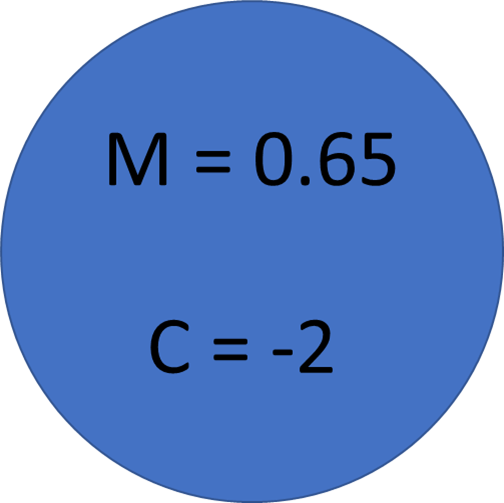


This node is our linear regression model. 

 $m$ and $C$ are properties of this model. Equation (1) defines every single possible straight line that can exist in two dimensions, whereas this node - our model - defines a singular linear equation, defined by the node's $m$ and $C$ values.

We could rewrite this node as

$$ Y = 0.65X - 2 $$

But we will not, because the node's values of $m$ and $C$ can change - they are variable. It is for this reason that we conceptualise the model as a node, and its variables $m$ and $C$ as the node's properties. To perform linear regression, we tune our model's values of $m$ and $C$ using observed data, such that our model produces the lowest possible loss over the totality of our observed data.

This tuning process is known as gradient descent, and I am going to ask you to run this process in code. 

I will write the cost function and gradient descent functions for you, give you the observed data and give you a node with two values as a model. I want you to optimise the model by entering the correct inputs into the marked code block and running all the code below. Do this by reading the code for the 'gradient_descent' function, and entering the correct inputs in the following code block where prompted.

To generate our data **run this code block:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.randn(1000)
Y = X*np.random.randn(1)*3 + np.random.randn(1000)*np.random.randn(1000)*np.random.randn(1) + np.random.randn(1)
plt.scatter(X,Y)

To create our loss and gradient descent functions, **run the following code block**. 

***Read the first line of the gradient_descent function code to understand the necessary inputs for this function***.

Some definitions to help you understand this code:

**Batch size**: In machine learning, batch size refers to the number of observations that we train on simultaneously. We compute the loss of each observation in the batch at the same time and average the results, to reduce the effects of nosie in a single observation and increase training speed.

**Epoch**: In machine learning, an epoch refers to one run-through of learning through a whole training dataset. If you have 100 observations, and a batch size of 5, one epoch refers to 20 batchs of the training data, such that all observations have been seen once. In many cases, we have to run through the training dataset multiple times, for multiple epochs, to ensure training is completed.

**Learning rate (LR)**: The size of gradient / weight adjustment following each training batch. A higher learning rate increases the speed of training, but also decreases the precision of optimisation, making training less likely to fully converge.

In [ ]:
def loss_function(label,pred):

  return 0.5 * (((label-pred)**2)**0.5)

def gradient_descent(X,Y,model,loss_function):
  epochs = 10000
  batch_size = 100
  data_size = len(X)
  lr = 0.01

  losses = []
  model_mvals =[]
  model_cvals =[]

  for i in range(epochs): # repeat training process for every epoch

      indices = np.random.randint(0,data_size, batch_size) # randomly generate indices for creating batches of data
      X_batch, labels = X[indices],Y[indices] # create data batches for training
      preds = model[0]* X_batch + model[1] # generate model predictions for input data
      # learning_rate = (lr - lr*((epochs-i)/epochs)+1e-4)
      loss = loss_function(labels,preds)
      loss = np.mean(loss)/np.mean(np.abs(preds))
      # print("Epoch {}/{}".format(i,epochs), end="\r")
      if loss>1e20: raise Exception("Loss is too high")


      ### This is the maths of the gradient descent algorithm, and is out of the scope of this course
      grad_C = np.mean(preds-labels)
      grad_m = np.mean(X_batch * (preds - labels).T)

      new_m = model[0] - grad_m*loss*lr
      new_C = model[1] - grad_C*loss*lr

      model[0] = new_m
      model[1] = new_C

      losses.append(loss)
      model_mvals.append(model[0])
      model_cvals.append(model[1])

  print("Gradient Descent Complete")
  return losses, model_mvals, model_cvals,model


### Now start gradient descent! Enter the correct inputs into the gradient descent function to initiate machine learning.

To initiate machine learning **enter the correct inputs to the gradient descent function and then run this code block**:

In [ ]:
#we initiate our model with some small random values
model = np.random.randn(2)/10

#remember, our data is stored in the variables X and Y
# losses,ms,cs,model = gradient_descent( #### INSERT INPUTS TO THE GRADIENT DESCENT ALGORITHM HERE ### ) 
losses,ms,cs,model = gradient_descent(X,Y... # REMOVE ELLIPSES AND WRITE CODE HERE!
                                      
                                      
plt.plot(losses)
plt.xlabel("Training Iterations")
plt.ylabel("Loss")

In [ ]:
print(model)
preds = model[0]*X + model[1]

plt.scatter(X,Y)
plt.plot(X,preds,c='r')

If you have done this stage correctly, your red line will closely follow the blue dots that represent our observed data. If this is what you see - **well done!**

Let's clear up interesting things that happened in our code that may not have been immediately apparent..

### Mean-Squared Error

You will see that, in our gradient_descent function, we take the mean of our loss function over a range of samples. Infact, we never use individual loss values anywhere in the code. If we iteratively trained using one single data point at a time, our training process would be very slow and perhaps prohibitively noisy. We'd be training sometimes on data far above and below the correct distribution, and perhaps never settle on the correct values of $m$ and $C$. 

To avoid singular data point training, we take batches of data points and calculate the mean loss of our model across all these points. Hence, in reality, we use a slightly different loss equation to that seen in equation (2) - we use the *mean* squared error (MSE) loss:

\begin{align}
MSE &= \sum_{i=1}^{n} \frac{\frac12(label_i - pred_i)^{2}}{n} \tag{3}
\end{align}

Don't worry that this equation looks rather intimidating. It means: 

>*The sum of losses over a batch of $n$ data points, divided by n*

Which is identical to saying the average of SE losses over a batch (sample) of data. 

### Describing the Gradient Descent Algorithm.

This course does not cover the calculus of the gradient descent algorithm; instead, we describe the algorithmic process in words. For those wanting to understand the calculus of gradient descent in more detail, watch these short videos (40 minutes in total):
[
Gradient Descent ](https://www.youtube.com/watch?v=IHZwWFHWa-w), [Backpropagation](https://www.youtube.com/watch?v=Ilg3gGewQ5U), and [Backpropagation Calculus](https://www.youtube.com/watch?v=tIeHLnjs5U8). **This knowledge is absolutely not necessary for this course.** 

### Understanding Gradient Descent
We describe the gradient descent algorithm below. This algorithm tunes a model's parameters, to produce a model that makes predictions on data with low loss.

1. **Loss and Label Prediction** When making a prediction on a sample (or a batch), we calculate the model's incorrectness by calculating the MSE (eqn. 3) of all the model's answers in comparison to the sample's labels. 

2. **Model Parameters** We know that our model has parameters ($m$ and $C$). If we look a eqn (1), we can see that our predicted $Y$ is a function of our input $X$, and our model parameters $m$ and $C$. This means, according to eqn. (2), that our model's loss is a function of: a) input $X$, b) our label, and c) our model parameters (in this case, $m$ and $C$).

3. **Loss is caused by faulty Model Parameters** If we make the assumption that $X$ and $Y$ are constants - perfectly measurable quantities observed with no uncertainity - then our loss is no longer a function of these values. This isolates the portion of loss - incorrectness - associated with our model to the model's parameters. Practically, this is done in training by taking each batch of input samples, keeping $X$ and $Y$ constant, and making small alterations in the model's parameters ($m$ and $C$ values), and seeing how loss varies with variation's in the model's parameters. 

4. **Gradient Descent** By looking at how the model's loss changes with respect to the model's parameters, we can choose to adjust the model's parameters in the direction that incurs the lowest loss. This process is termed 'gradient descent', because we are finding the gradient of the ***loss*** with respect to the ***model's parameters*** and heading ***down the gradient - choosing model parameters that minimise the loss***.


The fourth point is visualised below - each dot corresponds to a batch of inputs that our previous linear regression model reviewed, with its corresponding model parameter values and losses. Loss is reduced over time by following the gradient of the loss function (With respect to model parameters $m$ and $C$) down the curve until its minimum - the line represents the sequential path of $m$ and $C$ values the the model took in its attempts to minimise loss.



In [ ]:
import matplotlib.pyplot

fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(131,projection='3d')
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.scatter(ms,cs,losses, c = losses,s=5)
ax1.set_xlabel('Model parameter \'m\'')
ax1.set_ylabel('Model parameter \'C\'')
ax1.set_zlabel('Loss')
ax1.view_init(elev=45,azim=30)
ax1.plot(ms,cs,losses)

ax2.scatter(cs,losses, c = losses,s=15)
ax2.set_xlabel('Model parameter \'C\'')
ax2.set_ylabel('Loss')
ax2.plot(cs,losses,linewidth=0.6)

ax3.scatter(ms,losses, c = losses,s=15)
ax3.set_xlabel('Model parameter \'m\'')
ax3.set_ylabel('Loss')
ax3.plot(ms,losses,linewidth=0.6)

### Batch Size and Learning Rate

When we make adjustments to the model's parameters, we use three values to guide us: the loss, the gradient, and the *learning rate*.

Adjustments to our model parameters must be a function of loss to allow our model to converge on the correct parameters. If loss is low, we want our model parameter adjustments to be small, and not fly off the handle away from our nearly-converged state.

Adjustments to our model parameters must also be a function of the gradient between loss and the parameters, to tune our model's parameters in the direction of *reducing loss*.

Finally, adjustments to our model parameters are a function of the model's learning rate. This is a user-defined value ***(we choose the learning rate!)***, that dictates the rate of learning. A higher learning rate causes quicker training, as the model makes larger adjustments to the model parameter's with every training batch, but it also makes training more unstable. As mentioned above, if our model adjustments are too large, our model may not converge during training.

Putting these ideas into an equation, after training batch $i$, our model parameters can be described like so:

\begin{align}
Parameters_{i+1} &= Parameters_i - LearningRate * Loss_i * \frac{\Delta Parameters_i}{\Delta Loss_i} \tag{4}
\end{align}

where the second term's $\frac{\Delta Parameters_i}{\Delta Loss_i}$ portion is the gradient between the model's parameters and the model's loss after training batch $i$. This is codified in the gradient_descent function written above, in line 23-23



```
      new_m = model[0] + grad_m*learning_rate*np.mean(loss)
      new_C = model[1] + grad_C*learning_rate*np.mean(loss)
```



<a name="2.5"></a>
## 2.5 - COVID Example

Now, let's finally set you up with our COVID exercise! Like we said, we will chop up the COVID data into to sections at cases = $0.52e^6$. I want you to perform a linear regression on both datasets.

Our data:

In [ ]:
import matplotlib.pyplot as plt

plt.plot(covid_dataset_clean['CumCases'],covid_dataset_clean['CumDeaths'])
plt.xlabel('Cases')
plt.ylabel('Deaths')

First half, where number of cases is less than $0.52e^6$:

(We apply some preprocessing here, dividing our X data by 35000 and y data by 350. Don't worry about this, this is a preprocessing step that we will explain in tutorial 3).

In [ ]:
X1 = covid_dataset_clean['CumCases'][covid_dataset_clean['CumCases']<0.52e6].values/35000 ## We split the data at less than 0.52e6 and apply a normalising division
Y1 = covid_dataset_clean['CumDeaths'][covid_dataset_clean['CumCases']<0.52e6].values/350 ## We split the data at less than 0.52e6 and apply a normalising division
plt.scatter(X1,Y1)
plt.xlabel('Normalised Cases')
plt.ylabel('Normalised Deaths')

Second half, where number of cases exceed $0.52e^6$.

(Again, we apply some preprocessing parameters here - this will be explained later in the course.)

In [ ]:
X2 = covid_dataset_clean['CumCases'][covid_dataset_clean['CumCases']>0.52e6].values/2e5 ## We split the data at greater than 0.52e6 and apply a normalising division
Y2 = covid_dataset_clean['CumDeaths'][covid_dataset_clean['CumCases']>0.52e6].values/200 ## We split the data at greater than 0.52e6 and apply a normalising division
plt.scatter(X2,Y2)
plt.xlabel('Normalised Cases')
plt.ylabel('Normalised Deaths')

### Final Exercise

In the dedicated space, please enter your solution to the following problem: **find the model parameter values for a linear regression on each split of the data**. The model for cases less than $0.52e^6$ should have the variable name $model1$, and the corresponding data is called $X1$ and $Y1$. The model for cases exceeding $0.52e^6$ should have the variable name $model2$, and its corresponding data is called $X2$ and $Y2$.



In [ ]:
### Starting you off with a clue! We initiate model1 and model2 for you, and set up some of the
### code for starting gradient descent.

###
import numpy as np
model1 = np.random.randn(2)
model2 = np.random.randn(2)

losses1,ms1,cs1,model1 =gradient_descent(X1,Y1 ###Enter the rest of the inputs!
losses2, ...                                   ##Repeat for model2!

In [ ]:
print(model1,model2)

In [ ]:
### Test
fig = plt.figure(figsize=(12,6))
plt.plot(covid_dataset_clean['CumCases'],covid_dataset_clean['CumDeaths'],linewidth=3, label='Real COVID Data')

x_norm1 = covid_dataset_clean['CumCases'].values/35000
x_norm2 = covid_dataset_clean['CumCases'].values/2e5
preds1 = model1[0]*x_norm1 + model1[1]
preds2 = model2[0]*x_norm2 + model2[1]
preds1*=350
preds2*=200
plt.plot(covid_dataset_clean['CumCases'],preds1,linestyle='--',color='r',linewidth=2,label = "Pre-intervention death prediction")
plt.plot(covid_dataset_clean['CumCases'],preds2,linestyle='--',color='g',linewidth=2,label = "Post-intervention death prediction")
plt.vlines([covid_dataset_clean['CumCases'].max(),covid_dataset_clean['CumCases'].max()],
           [0,preds2[0]],[preds2[0],preds1[1]],linestyles=['-','dotted'],linewidths=3.5,label = "Total Deaths (Solid)\nLives Saved (Dotted)")
plt.xlim(0,covid_dataset_clean['CumCases'].max()*1.05)
plt.ylim(0,max(covid_dataset_clean['CumDeaths'].max(),preds2.max(),preds1.max()*1.05))
plt.grid()
plt.legend()

plt.xlabel('Number of Cases (millions)')
plt.ylabel('Number of Deaths')

lives_saved_thousands = int((preds1[0]-preds2[0])/1000)

bool1 = lives_saved_thousands > 73
bool2 = lives_saved_thousands < 77
print("Test passed: {}".format(bool1 and bool2))
print("Based on our linear regression model, it is estimated that {},000 lives were saved by COVID policies in the South-East of England.\n".format(lives_saved_thousands))

<a name="2.4"></a>
## 2.6 - Summary

If you completed the above exercise - congratulations! You have trained your first machine learning models. You learned:

1. How we measure the 'correctness' of our prediction during training, using the loss function.
2. How the gradient descent algorithm optimises machine learning models.
3. How batch size and learning rate effects training.
4. The importance of data visualisation and preprocessing before diving into machine learning.

These lessons are enormously important in any algorithm that trains in gradient descent, including the state-of-the-art AI in computer vision and natural language processing, such as Transformers and Convolutional Neural Networks.

In the next tutorial, we will learn to to perform regression and classification on multiple variables. This will allow us to make highly sophisticated predictions that take into account multiple variables, and their interactions, simultaneously.